In [1]:
%ls ../papsmear-data/

carcinoma_in_situ/    normal_columnar/      severe_dysplastic/
light_dysplastic/     normal_intermediate/
moderate_dysplastic/  normal_superficiel/


In [2]:
# %ls ../papsmear-data/normal_columnar/

In [3]:
# %ls ../papsmear-data/severe_dysplastic/

# Import packages

In [4]:
%matplotlib inline

In [5]:
# system
import os
import sys

# standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading .bmp files - failed
from scipy import misc

# skimage
from skimage import io

# Load Images and Masks

In [6]:
DATA_PATH = '../papsmear-data/'
FOLDER_PATH = '../papsmear-data/normal_columnar'

## File names

In [7]:
file_names = os.listdir(FOLDER_PATH)
file_names.sort()

file_names[:10]

['153956040-153956058-001-d.bmp',
 '153956040-153956058-001.BMP',
 '153956040-153956058-002-d.bmp',
 '153956040-153956058-002.BMP',
 '153956040-153956058-003-d.bmp',
 '153956040-153956058-003.BMP',
 '153956040-153956058-004-d.bmp',
 '153956040-153956058-004.BMP',
 '153956040-153956058-005-d.bmp',
 '153956040-153956058-005.BMP']

In [8]:
img_names = [s for s in file_names if '-d' not in s]
img_names.sort()
img_names[:5]

['153956040-153956058-001.BMP',
 '153956040-153956058-002.BMP',
 '153956040-153956058-003.BMP',
 '153956040-153956058-004.BMP',
 '153956040-153956058-005.BMP']

In [9]:
mask_names = [s for s in file_names if '-d' in s ]
mask_names.sort()
mask_names[:5]

['153956040-153956058-001-d.bmp',
 '153956040-153956058-002-d.bmp',
 '153956040-153956058-003-d.bmp',
 '153956040-153956058-004-d.bmp',
 '153956040-153956058-005-d.bmp']

In [10]:
# no intersection there
assert len( set(mask_names).intersection(set(img_names)) ) == 0

## Image/mask Indexes

In [11]:
idxs = sorted([name.split('.')[0] for name in img_names])
idxs[:5]

['153956040-153956058-001',
 '153956040-153956058-002',
 '153956040-153956058-003',
 '153956040-153956058-004',
 '153956040-153956058-005']

In [12]:
print('Image Shape', ' '*(15 - len('Image Shape')), '| Mask Shape')
print(30 * '-')

for idx in idxs:
    
    # make indexes into file names
    img_name = idx + '.BMP'
    mask_name = idx + '-d.bmp'
    
    # read off a pair
    image = io.imread(os.path.join(FOLDER_PATH, img_name))
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))
    
    # check the shape correspondance
    assert image.shape[:2] == mask.shape[:2]
    
    # print shapes
    print(image.shape, ' '*(15 - len(str(image.shape))), '|', mask.shape)

Image Shape      | Mask Shape
------------------------------
(80, 158, 3)     | (80, 158, 4)
(127, 91, 3)     | (127, 91, 4)
(133, 83, 3)     | (133, 83, 4)
(86, 177, 3)     | (86, 177, 4)
(132, 80, 3)     | (132, 80, 4)
(109, 88, 3)     | (109, 88, 4)
(116, 91, 3)     | (116, 91, 4)
(129, 154, 3)    | (129, 154, 4)
(145, 91, 3)     | (145, 91, 4)
(161, 89, 3)     | (161, 89, 4)
(100, 130, 3)    | (100, 130, 4)
(71, 124, 3)     | (71, 124, 4)
(107, 57, 3)     | (107, 57, 4)
(149, 62, 3)     | (149, 62, 4)
(85, 76, 3)      | (85, 76, 4)
(104, 69, 3)     | (104, 69, 4)
(59, 108, 3)     | (59, 108, 4)
(51, 73, 3)      | (51, 73, 4)
(58, 126, 3)     | (58, 126, 4)
(156, 53, 3)     | (156, 53, 4)
(82, 48, 3)      | (82, 48, 4)
(130, 40, 3)     | (130, 40, 4)
(139, 85, 3)     | (139, 85, 4)
(53, 94, 3)      | (53, 94, 4)
(49, 128, 3)     | (49, 128, 4)
(32, 103, 3)     | (32, 103, 4)
(67, 92, 3)      | (67, 92, 4)
(68, 42, 3)      | (68, 42, 4)
(52, 89, 3)      | (52, 89, 4)
(58, 65, 3)     

# Read an Image/Mask pair

In [13]:
idx = '153956040-153956058-001'

In [14]:
img1 = io.imread(os.path.join(FOLDER_PATH, f'{idx}.BMP'))
print('Shape:', img1.shape)

Shape: (80, 158, 3)


In [15]:
print('Unique elements:')
np.unique(img1)

Unique elements:


array([124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 161, 162, 163, 164, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255], dtype=uint8)

In [16]:
mask1 = io.imread(os.path.join(FOLDER_PATH,f'{idx}-d.bmp'))
print('Shape:', mask1.shape)

Shape: (80, 158, 4)


In [17]:
print('Unique elements:')
np.unique(mask1)

Unique elements:


array([  0, 128, 255], dtype=uint8)

# Plot an Image/Mask pair

## Original image

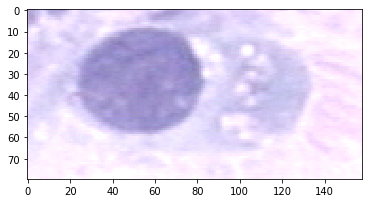

In [18]:
plt.imshow(img1)
plt.show()

## 3 channels in gray-scale

Channel 0


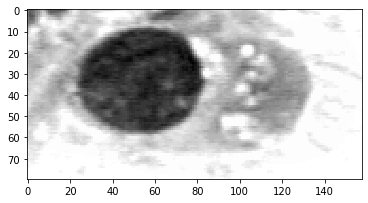

Channel 1


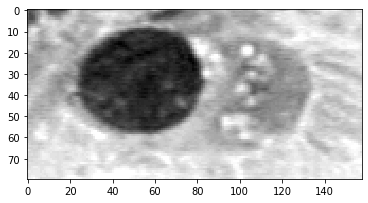

Channel 2


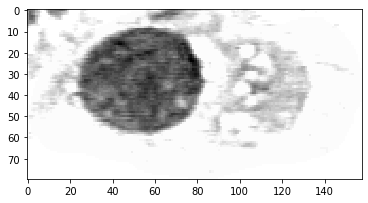

In [19]:
# 3 channels in gray-scale
for i in range(img1.shape[-1]):
    print('Channel', i)
    plt.imshow(img1[:, :, i], cmap='gray')
    plt.show()

## Original in gray-scale and 3 channels (assume RGB)

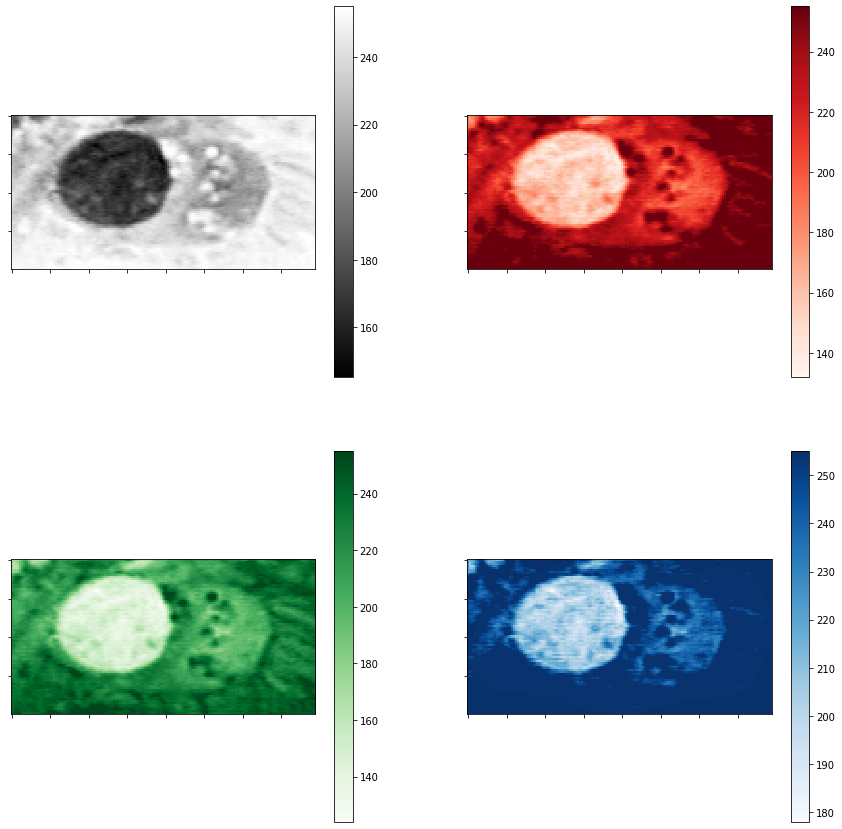

In [20]:
# https://stackoverflow.com/questions/39885178/how-can-i-see-the-rgb-channels-of-a-given-image-with-python
# ---------------------------------------------------------------------------------------------------------

# Split
gray = img1.mean(axis=-1)
red = img1[:, :, 0]
green = img1[:, :, 1]
blue = img1[:, :, 2]

# Plot
fig, axs = plt.subplots(2,2, figsize=(15,15))

cax_00 = axs[0,0].imshow(gray, cmap='gray')
fig.colorbar(cax_00, ax=axs[0,0])
axs[0,0].xaxis.set_major_formatter(plt.NullFormatter())  # kill xlabels
axs[0,0].yaxis.set_major_formatter(plt.NullFormatter())  # kill ylabels

cax_01 = axs[0,1].imshow(red, cmap='Reds')
fig.colorbar(cax_01, ax=axs[0,1])
axs[0,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[0,1].yaxis.set_major_formatter(plt.NullFormatter())

cax_10 = axs[1,0].imshow(green, cmap='Greens')
fig.colorbar(cax_10, ax=axs[1,0])
axs[1,0].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,0].yaxis.set_major_formatter(plt.NullFormatter())

cax_11 = axs[1,1].imshow(blue, cmap='Blues')
fig.colorbar(cax_11, ax=axs[1,1])
axs[1,1].xaxis.set_major_formatter(plt.NullFormatter())
axs[1,1].yaxis.set_major_formatter(plt.NullFormatter())
plt.show()

## Histograms of intensities

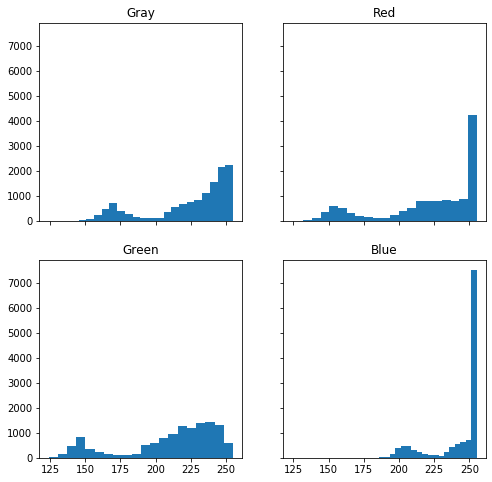

In [21]:
# Plot histograms
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))

axs[0, 0].hist(gray.ravel(), bins=20)
axs[0, 0].set_title('Gray')
axs[0, 1].hist(red.ravel(), bins=20)
axs[0, 1].set_title('Red')
axs[1, 0].hist(green.ravel(), bins=20)
axs[1, 0].set_title('Green')
axs[1, 1].hist(blue.ravel(), bins=20)
axs[1, 1].set_title('Blue')

plt.show()

No need for image contrast. See: **lecture_1_notebook_02_image_contrast.ipynb**

## 4 channels of mask in gray-scale

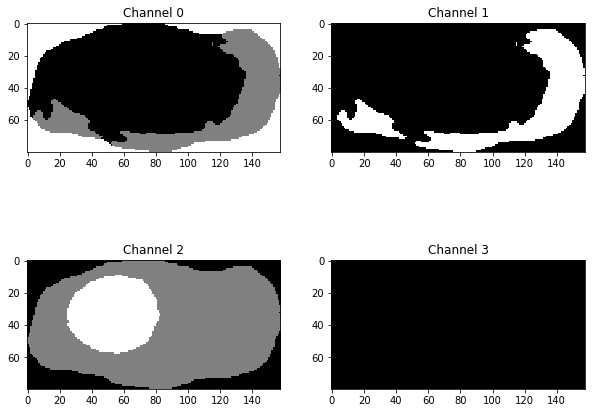

In [27]:

fig, axs = plt.subplots(2, 2, figsize = (10, 8))

for i in range(mask1.shape[-1]):
    # print('Channel', i)
    
    axs[i//2, i%2].set_title(f'Channel {i}')
    axs[i//2, i%2].imshow(mask1[:, :, i], cmap='gray')
    fig.show()

In [23]:
np.unique(mask1[:, :, 3])

array([255], dtype=uint8)

## Check if the last channel is useless

In [24]:
avg_mask = mask1.mean(axis=-1)

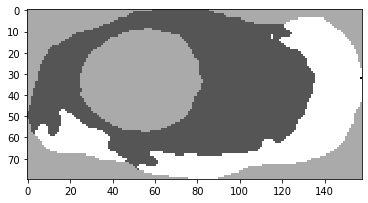

In [25]:
plt.imshow(avg_mask, cmap='gray')
plt.show()

In [26]:
np.unique(avg_mask)

array([ 63.75,  95.75, 127.5 , 159.75])

In [27]:
avg_mask_wo_last = mask1[:, :, :3].mean(-1)
np.unique(avg_mask_wo_last)

array([  0.        ,  42.66666667,  85.        , 128.        ])

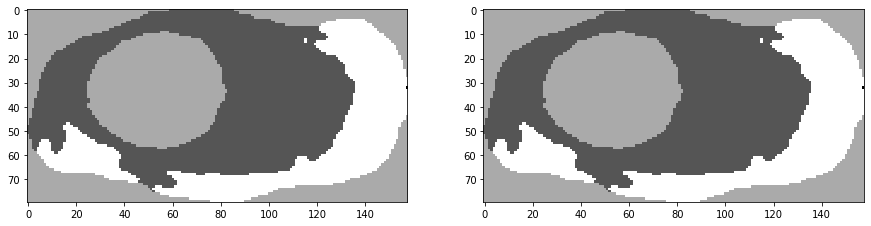

In [28]:
# Plot
fig, axs = plt.subplots(1,2, figsize=(15,15))

cax_00 = axs[0].imshow(avg_mask, cmap='gray')
cax_01 = axs[1].imshow(avg_mask_wo_last, cmap='gray')

## Check if the last channel is the same for all images in this folder

In [29]:
#print('Image Shape', ' '*(15 - len('Image Shape')), '| Mask Shape')
#print(30 * '-')

one_value = np.array([None for _ in range(len(idxs))])
which_value = np.array([None for _ in range(len(idxs))])
i = 0

for idx in idxs:
    
    # mask names
    mask_name = idx + '-d.bmp'
    
    # read off a mask
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))
    
    # unique values
    unique_values = np.unique(mask[:, :, -1])
    
    # record
    one_value[i] = (len(unique_values) == 1)
    which_value[i] = unique_values[0]
    
    # increment
    i += 1

In [30]:
one_value

array([True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True],
      dtype=object)

In [31]:
one_value.all()

True

In [32]:
which_value

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255], dtype=object)

**The last channel is inded the same for all images and has a plain white image in it.**

# Leaving only 3 segments: nucleus, cytoplasm and background

Channel 2 of the label seems to provide such split.

Channel 2


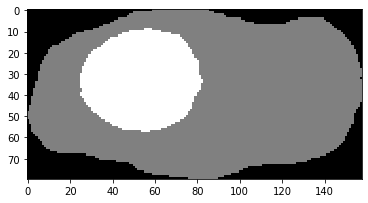

In [33]:
print('Channel', 2)
plt.imshow(mask1[:, :, 2], cmap='gray')
plt.show()

In [34]:
# values
np.unique(mask1[:, :, 2])

array([  0, 128, 255], dtype=uint8)

| Part       | Colour | Intensity |
|------------|-------:|-----------|
| Nucleus    |  White | 255       |
| Cytoplasm  |   Gray | 128       |
| Background |  Black | 0         |

## Check if all channel 2 in this folder have this separation:

In [35]:
for idx in idxs:
    
    # make indexes into file names
    mask_name = idx + '-d.bmp'
    
    # read off a mask
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))
    
    # print unique values
    vals = np.unique(mask[:, :, 2])
    print(vals)
    
    assert (vals == np.array([0, 128, 255])).all()

[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0 1

# Check that this applies to all folders

In [36]:
folder_names = os.listdir(DATA_PATH)
folder_names

['light_dysplastic',
 'moderate_dysplastic',
 'normal_columnar',
 'carcinoma_in_situ',
 'severe_dysplastic',
 'normal_intermediate',
 '.DS_Store',
 'normal_superficiel']

In [37]:
folder_paths = [os.path.join(DATA_PATH, folder_name) for folder_name in folder_names]
folder_paths

['../papsmear-data/light_dysplastic',
 '../papsmear-data/moderate_dysplastic',
 '../papsmear-data/normal_columnar',
 '../papsmear-data/carcinoma_in_situ',
 '../papsmear-data/severe_dysplastic',
 '../papsmear-data/normal_intermediate',
 '../papsmear-data/.DS_Store',
 '../papsmear-data/normal_superficiel']

In [38]:
for folder_path in folder_paths:
    
    # file names: all, images, masks
    file_names = sorted(os.listdir(FOLDER_PATH))
    img_names = sorted([s for s in file_names if '-d' not in s])
    mask_names = sorted([s for s in file_names if '-d' in s ])

    # no intersection there
    assert len( set(mask_names).intersection(set(img_names)) ) == 0
    
    # patient ids (indexes)
    idxs = sorted([name.split('.')[0] for name in img_names])
    
#     # manual check
#     print(idxs)
#     print()
    
    
    # iterating through images
    for idx in idxs:
    
        # make indexes into file names
        mask_name = idx + '-d.bmp'

        # read off a mask
        mask = io.imread(os.path.join(FOLDER_PATH, mask_name))

#         # manual check
#         vals = np.unique(mask[:, :, 2])
#         print(vals)

        assert (vals == np.array([0, 128, 255])).all()
    

print("All channel-2 masks have 3 values!")

All channel-2 masks have 3 values!


**This is indeed true for all masks in all folders. $\implies$ We use channel 2 for our purposes.** 

# Check that the correspondance holds for more images

In [39]:
FOLDER_PATH = '../papsmear-data/normal_columnar'

In [40]:
# file names: all, images, masks

file_names = sorted(os.listdir(FOLDER_PATH))
img_names = sorted([s for s in file_names if '-d' not in s])
mask_names = sorted([s for s in file_names if '-d' in s ])

# no intersection there
assert len( set(mask_names).intersection(set(img_names)) ) == 0

In [41]:
# patient ids (indexes)
idxs = sorted([name.split('.')[0] for name in img_names])

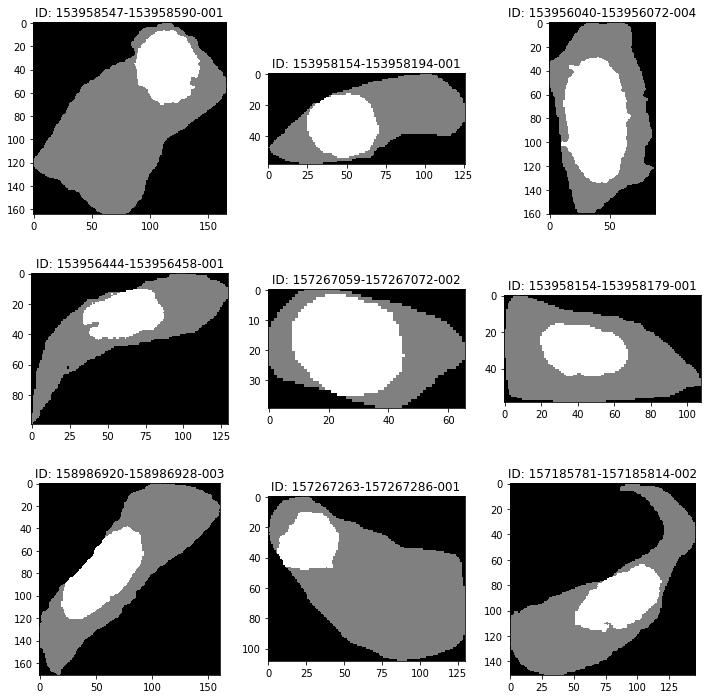

In [29]:
# choose samles to show
show_x = 3
show_y = 3
show_total = show_x * show_y

sample_idxs = np.random.choice(idxs, show_total, replace=False)

# iterating through <show_total> random images
fig, axs = plt.subplots(show_x, show_y, figsize=(12, 12))

i = 0
for idx in sample_idxs:

    # make indexes into file names
    mask_name = idx + '-d.bmp'

    # read off a mask
    mask = io.imread(os.path.join(FOLDER_PATH, mask_name))[:, :, 2]
    
    axs[i//show_y, i % show_y].imshow(mask, cmap='gray')
    axs[i//show_y, i % show_y].set_title(f'ID: {idx}')
    fig.show()
    
    # increment i
    i += 1

**Looks like the correspondence stays the same.**
- White nucleus
- Gray cytoplasm
- Black background